In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('/content/Wholesale customers data.csv')

## **Analyse the dataset**

In [3]:
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [5]:
data.shape

(440, 8)

## **Data Preprocessing**

In [6]:
data.isna().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

In [7]:
data.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


outliers - not required

Encoding - not required

## **Scaling**

In [8]:
# Min Max Scaling
from sklearn.preprocessing import MinMaxScaler

In [9]:
min_max = MinMaxScaler()

In [10]:
k = data.drop(['Channel','Region'],axis=1)
x = min_max.fit_transform(k)

In [11]:
pd.DataFrame(x).head()

,0,1,2,3,4,5
0,0.112940,0.130727,0.081464,0.003106,0.065427,0.027847
1,0.062899,0.132824,0.103097,0.028548,0.080590,0.036984
2,0.056622,0.119181,0.082790,0.039116,0.086052,0.163559
3,0.118254,0.015536,0.045464,0.104842,0.012346,0.037234
4,0.201626,0.072914,0.077552,0.063934,0.043455,0.108093


## **Clustering**

# **1. K-Means Clustering**

In [12]:
from sklearn.cluster import KMeans

In [13]:
wcss = []
for i in range(1,11):
  km = KMeans(n_clusters=i, n_init=20)
  km.fit(x)
  css = km.inertia_
  wcss.append(css)


In [14]:
wcss

[24.924244504665523,
 17.246032935216448,
 13.878391698659025,
 10.76666039838505,
 9.102117584922219,
 7.9652589386433,
 7.174652418797669,
 6.4892820306761685,
 5.920774129351889,
 5.406751304934112]

## **Elbow Method** (For choosing the right number of clusters)

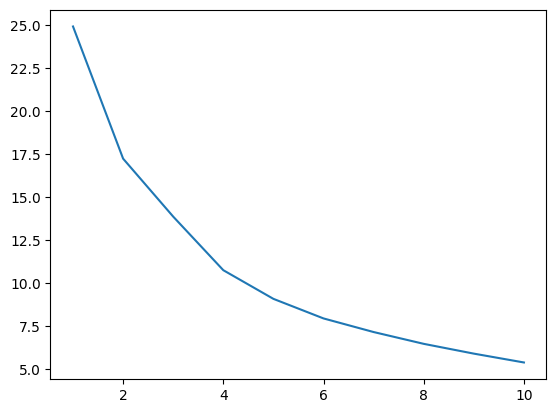

In [15]:
plt.plot(range(1,11),wcss)
plt.show()

In [16]:
# Optimal Number of cluster should be in 2 or 4 or 5

## **Silhouette Score**

In [17]:
from sklearn.metrics import silhouette_score

In [18]:
# Cluster 4
km = KMeans(n_clusters=4)
km.fit(x)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4)

In [19]:
cluster_label4 = km.predict(x)

In [20]:
silh_score = silhouette_score(x, cluster_label4)
silh_score

0.40926069818401895

In [21]:
# Cluster 2
km_sample2 = KMeans(n_clusters=2)
km_sample2.fit(x)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=2)

In [22]:
cluster_label2 = km_sample2.predict(x)

In [23]:
silh_score2 = silhouette_score(x, cluster_label2)
silh_score2

0.5729735321213333

In [24]:
#Cluster 2 have higher Silhouette Score.
# We can pick 2 clusters

# **2. Agglomerative Clustering**

In [25]:
#Dendrogram
import scipy.cluster.hierarchy as shc

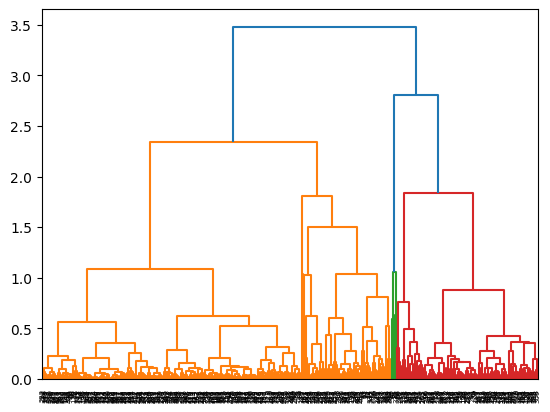

In [26]:
dendrogram = shc.dendrogram(shc.linkage(x, method='ward'))
plt.show()

In [27]:
from sklearn.cluster import AgglomerativeClustering

In [28]:
# Optimal Number of cluster should be in 2 or 4

In [29]:
#Cluster = 2
ag_cluster_2 = AgglomerativeClustering(n_clusters=2 ,affinity='euclidean', linkage='ward')
ag_predict_2 = ag_cluster_2.fit_predict(x)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [30]:
silhouette_score(x,ag_predict_2)

0.34038518197273104

In [31]:
#Cluster = 4
ag_cluster_4 = AgglomerativeClustering(n_clusters=4 ,affinity='euclidean', linkage='ward')
ag_predict_4 = ag_cluster_4.fit_predict(x)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [32]:
silhouette_score(x,ag_predict_4)

0.31581931974412564

In [33]:
# Cluster -2 have 0.34038518197273104
# Cluster -4 have 0.31581931974412564

*Conclusion*

    Number of clusters for KMeans clustering is 2

    -----------------------------------------------------
    Number of clusters for Agglomerative clustering is 2.
    
    Because silhouette score is higher.

## **DBSCAN Clustering**

In [34]:
from sklearn.cluster import DBSCAN

In [35]:
db = DBSCAN()
silhouette_score(x, db.fit_predict(x),  metric='euclidean')

0.7832710580980035

In [36]:
db_sample1 = DBSCAN(min_samples=8, eps=.8) # try changing eps and min_samples
silhouette_score(x, db_sample1.fit_predict(x),  metric='euclidean')

0.7998319811273489

In [37]:
db_sample2 = DBSCAN(min_samples=2, eps=0.3) # try changing eps and min_samples
silhouette_score(x, db_sample2.fit_predict(x),  metric='euclidean')

0.750819528598978

In [38]:
db_sample3 = DBSCAN(min_samples=1, eps=0.3) # try changing eps and min_samples
silhouette_score(x, db_sample3.fit_predict(x),  metric='euclidean')

0.6053107709058507

In [39]:
# db_sample1 have higher value
# 0.7998319811273489

## **PCA**

In [40]:
from sklearn.decomposition import PCA

In [41]:
pc = PCA()

In [42]:
pc_array = pc.fit_transform(x)

In [43]:
pc_array.shape

(440, 6)

In [44]:
pc_cmp = PCA(n_components = 3)

In [45]:
pc_array = pc_cmp.fit_transform(x)

In [46]:
pc_array.shape

(440, 3)

In [48]:
 pc_data = pd.DataFrame(pc_array,columns = ['PC1', 'PC2', 'PC3'])
 pc_data.head()

,PC1,PC2,PC3
0,0.020446,-0.004124,-0.016385
1,0.045003,-0.036889,0.024454
2,0.040474,-0.013746,0.079127
3,-0.092295,0.028786,0.027925
4,-0.020514,0.106330,-0.004159


    Conclusion

# **KMeans clustering**

2 Cluster - 0.5729735321213333

4 Cluster - 0.40926069818401895

# **Agglomerative clustering**


   2 Cluster - 0.34038518197273104

   4 Cluster - 0.31581931974412564

# **DBScan**
min_sample 5 - 0.7832710580980035

min_sample 8 - 0.7998319811273489
